# Classify different data sets

### Basic includes

In [1]:
# Using pandas to load the csv file
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from keras import models 
from keras import layers 
from keras import callbacks
from keras import optimizers
from keras.utils import to_categorical

# reuters and fashin mnist data set from keras
from keras.datasets import reuters
from keras.datasets import fashion_mnist

# needed to preprocess text
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


### Classify the Fashion Mnist

---

In [ ]:
(fashion_train_data, fashion_train_labels), (fashion_test_data, fashion_test_labels) = fashion_mnist.load_data()

print(fashion_train_data.shape)
print(fashion_test_data.shape)
test_index = 10
plt.title("Label: " + str(fashion_train_labels[test_index]))
plt.imshow(fashion_train_data[test_index], cmap="gray")

## Standarizing images

standarizing data images and creating one hot labels

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [ ]:
fashion_train_data = fashion_train_data.reshape((60000, 28 * 28))
fashion_train_data = fashion_train_data.astype('float32') / 255 

fashion_test_data = fashion_test_data.reshape((10000, 28 * 28)) 
fashion_test_data = fashion_test_data.astype('float32') / 255

# one hot encoding
fashion_one_hot_labels = to_categorical(fashion_train_labels)
fashion_test_one_hot_labels = to_categorical(fashion_test_labels)

#creating validation set for first 10000 elements
fashion_validation_data = fashion_train_data[:10000]
fashion_validation_labels = fashion_one_hot_labels[:10000]

#creating input set
x_data = fashion_train_data[10000:]
y_data = fashion_one_hot_labels[10000:]
print(x_data.shape)
print(y_data.shape)

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [ ]:
#building keras model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=784))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(len(fashion_one_hot_labels[0]), activation='softmax'))
model.summary()

# included the early stopping which monitors the validation loss
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=4)
model.compile(loss='categorical_hinge', 
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_data, y_data,
          batch_size=512,
          epochs=40,
          validation_data=(fashion_validation_data, fashion_validation_labels),
          callbacks=[early_stop],
          verbose=2)

In [ ]:
#evaluating the model with the test data
results = model.evaluate(fashion_test_data, fashion_test_one_hot_labels)
print(results)

history_dict = history.history
print(history_dict.keys())

#creating list variables for plotting validation
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)



#plotting validation and training loss

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#plotting validation and train accuracy

plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Classifying newswires

---

Build a network to classify Reuters newswires into 46 different mutually-exclusive topics.

### Load and review the data

In [2]:
(reuters_train_data, reuters_train_labels),(reuters_test_data, reuters_test_labels) = reuters.load_data(num_words=10000)

print(reuters_train_data.shape)
print(reuters_train_labels.shape)
print(reuters_train_data[0])
print(reuters_train_labels[0])
print(set(reuters_train_labels))

(8982,)
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}


Load the word index to decode the train data.

In [3]:
word_index = reuters.get_word_index()

reverse_index = dict([(value+3, key) for (key, value) in word_index.items()])

reverse_index[0] = "<PAD>"
reverse_index[1] = "<START>"
reverse_index[2] = "<UNKNOWN>"  # unknown
reverse_index[3] = "<UNUSED>"

decoded_review = ' '.join([reverse_index.get(i,'?') for i in reuters_train_data[0]])

print(decoded_review)

<START> <UNKNOWN> <UNKNOWN> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [4]:
tokenizer = Tokenizer(reuters_train_data.shape[0])
reuters_train_data_token = tokenizer.sequences_to_matrix(reuters_train_data, mode='binary')
reuters_test_data_token = tokenizer.sequences_to_matrix(reuters_test_data, mode='binary')
print(reuters_train_data_token.shape)
print(reuters_test_data_token.shape)

# One-hot encoding the output
reuters_one_hot_train_labels = to_categorical(reuters_train_labels)
reuters_one_hot_test_labels = to_categorical(reuters_test_labels)
print(reuters_one_hot_train_labels.shape)
print(reuters_one_hot_test_labels.shape)

# Creating a validation set with the first 10000 reviews
reuters_validation_data = reuters_train_data_token[:2982]
reuters_validation_labels = reuters_one_hot_train_labels[:2982]
print(reuters_validation_data.shape)
print(reuters_validation_labels.shape)
# Creating the input set for the 
x_data = reuters_train_data_token[2982:]
y_data = reuters_one_hot_train_labels[2982:]
print("x:",x_data.shape)
print("y:",y_data.shape)

(8982, 8982)
(2246, 8982)
(8982, 46)
(2246, 46)
(2982, 8982)
(2982, 46)
x: (6000, 8982)
y: (6000, 46)


In [5]:
#building keras model
model1 = models.Sequential()
model1.add(layers.Dense(256, activation='relu', input_dim=len(reuters_train_data)))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(len(reuters_one_hot_test_labels[0]), activation='softmax'))
model1.summary()

# included the early stopping which monitors the validation loss
# early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=4)

model1.compile(loss='mean_absolute_error', 
              optimizer='adam',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2299648   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 46)                5934      
Total params: 2,338,478
Trainable params: 2,338,478
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model1.fit(x_data, y_data,
          batch_size=256,
          epochs=50,
          validation_data=(reuters_validation_data, reuters_validation_labels),
          verbose=2)

Train on 6000 samples, validate on 2982 samples
Epoch 1/50
 - 3s - loss: 0.0353 - acc: 0.4147 - val_loss: 0.0217 - val_acc: 0.5262
Epoch 2/50
 - 2s - loss: 0.0206 - acc: 0.5325 - val_loss: 0.0203 - val_acc: 0.5342
Epoch 3/50
 - 3s - loss: 0.0197 - acc: 0.5487 - val_loss: 0.0203 - val_acc: 0.5335
Epoch 4/50
 - 2s - loss: 0.0195 - acc: 0.5520 - val_loss: 0.0203 - val_acc: 0.5339
Epoch 5/50
 - 3s - loss: 0.0194 - acc: 0.5538 - val_loss: 0.0203 - val_acc: 0.5339
Epoch 6/50
 - 2s - loss: 0.0193 - acc: 0.5572 - val_loss: 0.0202 - val_acc: 0.5352
Epoch 7/50
 - 2s - loss: 0.0192 - acc: 0.5585 - val_loss: 0.0202 - val_acc: 0.5349
Epoch 8/50
 - 3s - loss: 0.0192 - acc: 0.5600 - val_loss: 0.0202 - val_acc: 0.5362
Epoch 9/50
 - 2s - loss: 0.0191 - acc: 0.5605 - val_loss: 0.0203 - val_acc: 0.5345
Epoch 10/50
 - 2s - loss: 0.0191 - acc: 0.5610 - val_loss: 0.0202 - val_acc: 0.5349
Epoch 11/50
 - 2s - loss: 0.0191 - acc: 0.5612 - val_loss: 0.0202 - val_acc: 0.5352
Epoch 12/50
 - 2s - loss: 0.0191 - ac

(2246,)
(2246, 46)
2246/2246 [==============================] - 0s 174us/step
[0.012865810310061713, 0.7048085484776451]
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


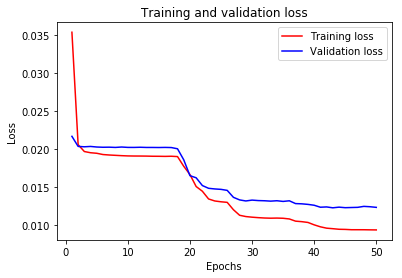

In [7]:
#evaluating the model with the test data
print(reuters_test_data.shape)
print(reuters_one_hot_test_labels.shape)
results = model1.evaluate(reuters_test_data_token, reuters_one_hot_test_labels)
print(results)

history_dict = history.history
print(history_dict.keys())

#creating list variables for plotting validation
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)



#plotting validation and training loss

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

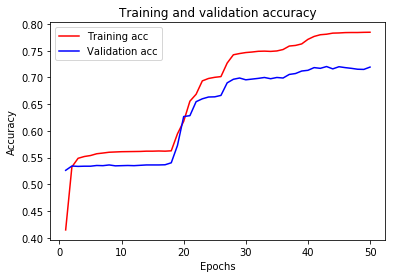

In [8]:
#plotting validation and train accuracy

plt.clf()

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

## Predicting Student Admissions

---

Predict student admissions based on three pieces of data:

- GRE Scores
- GPA Scores
- Class rank

### Load and visualize the data

In [9]:
student_data = pd.read_csv("student_data.csv")
print(student_data)

     admit    gre   gpa  rank
0        0  380.0  3.61   3.0
1        1  660.0  3.67   3.0
2        1  800.0  4.00   1.0
3        1  640.0  3.19   4.0
4        0  520.0  2.93   4.0
5        1  760.0  3.00   2.0
6        1  560.0  2.98   1.0
7        0  400.0  3.08   2.0
8        1  540.0  3.39   3.0
9        0  700.0  3.92   2.0
10       0  800.0  4.00   4.0
11       0  440.0  3.22   1.0
12       1  760.0  4.00   1.0
13       0  700.0  3.08   2.0
14       1  700.0  4.00   1.0
15       0  480.0  3.44   3.0
16       0  780.0  3.87   4.0
17       0  360.0  2.56   3.0
18       0  800.0  3.75   2.0
19       1  540.0  3.81   1.0
20       0  500.0  3.17   3.0
21       1  660.0  3.63   2.0
22       0  600.0  2.82   4.0
23       0  680.0  3.19   4.0
24       1  760.0  3.35   2.0
25       1  800.0  3.66   1.0
26       1  620.0  3.61   1.0
27       1  520.0  3.74   4.0
28       1  780.0  3.22   2.0
29       0  520.0  3.29   1.0
..     ...    ...   ...   ...
370      1  540.0  3.77   2.0
371      1

Plot of the GRE and the GPA from the data.

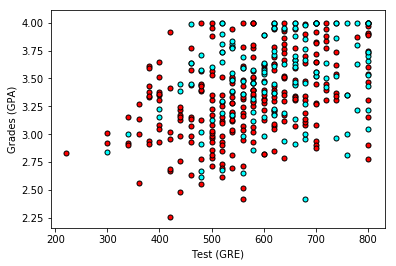

In [10]:
X = np.array(student_data[["gre","gpa"]])
y = np.array(student_data["admit"])
admitted = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]
plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
plt.xlabel('Test (GRE)')
plt.ylabel('Grades (GPA)')

plt.show()

Plot of the data by class rank.

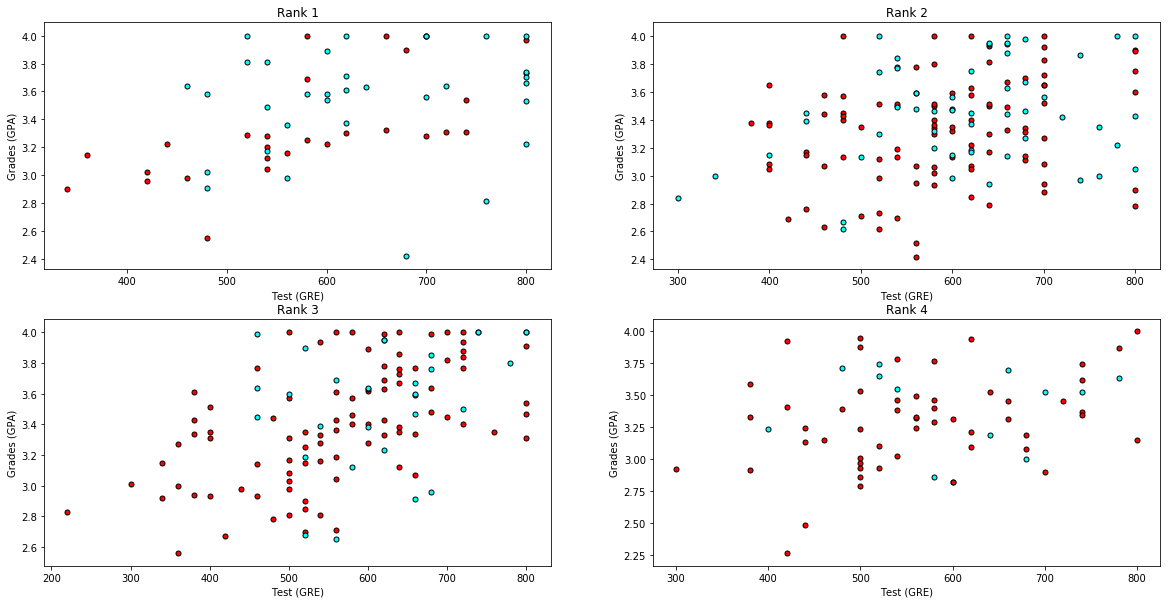

In [13]:
f, plots = plt.subplots(2, 2, figsize=(20,10))
plots = [plot for sublist in plots for plot in sublist]

for idx, plot in enumerate(plots):
    data_rank = student_data[student_data["rank"]==idx+1]
    plot.set_title("Rank " + str(idx+1))
    X = np.array(data_rank[["gre","gpa"]])
    y = np.array(data_rank["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plot.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plot.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plot.set_xlabel('Test (GRE)')
    plot.set_ylabel('Grades (GPA)')
    

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set